In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

In [2]:
df=pd.read_csv("cleaned_weather.csv")
df.head()

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81


In [3]:
print(df.shape)
print(df.columns)

(52696, 21)
Index(['date', 'p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh',
       'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR',
       'max. PAR', 'Tlog'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      52696 non-null  object 
 1   p         52696 non-null  float64
 2   T         52696 non-null  float64
 3   Tpot      52696 non-null  float64
 4   Tdew      52696 non-null  float64
 5   rh        52696 non-null  float64
 6   VPmax     52696 non-null  float64
 7   VPact     52696 non-null  float64
 8   VPdef     52696 non-null  float64
 9   sh        52696 non-null  float64
 10  H2OC      52696 non-null  float64
 11  rho       52696 non-null  float64
 12  wv        52696 non-null  float64
 13  max. wv   52696 non-null  float64
 14  wd        52696 non-null  float64
 15  rain      52696 non-null  float64
 16  raining   52696 non-null  float64
 17  SWDR      52696 non-null  float64
 18  PAR       52696 non-null  float64
 19  max. PAR  52696 non-null  float64
 20  Tlog      52696 non-null  fl

In [5]:
df.isnull().sum()

date        0
p           0
T           0
Tpot        0
Tdew        0
rh          0
VPmax       0
VPact       0
VPdef       0
sh          0
H2OC        0
rho         0
wv          0
max. wv     0
wd          0
rain        0
raining     0
SWDR        0
PAR         0
max. PAR    0
Tlog        0
dtype: int64

In [6]:
df.duplicated().sum()
df[df.duplicated]

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
19044,2020-05-12 06:00:00,991.53,-1.57,272.25,-2.09,96.2,5.44,5.24,0.21,3.29,...,1269.29,1.04,1.68,215.4,0.0,0.0,84.91,176.64,199.61,10.19


In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    skew_val = df[col].skew()
    print(f"{col}: {skew_val:.3f}")

p: -0.402
T: 0.326
Tpot: 0.272
Tdew: 0.037
rh: -0.448
VPmax: 1.327
VPact: 0.806
VPdef: 2.093
sh: 0.813
H2OC: 0.806
rho: 0.066
wv: -229.091
max. wv: 1.372
wd: -0.508
rain: 34.935
raining: 4.445
SWDR: 1.829
PAR: 1.830
max. PAR: -2.002
Tlog: 0.513


In [9]:
for col in num_cols:
    skew_val = df[col].skew()
    if abs(skew_val) >= 0.5:
        if (df[col] <= 0).any():
            pt = PowerTransformer(method='yeo-johnson')
            df[col] = pt.fit_transform(df[[col]])
        else:
            df[col] = np.log1p(df[col])

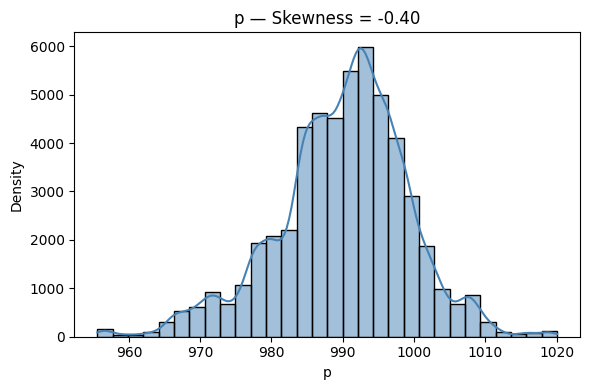

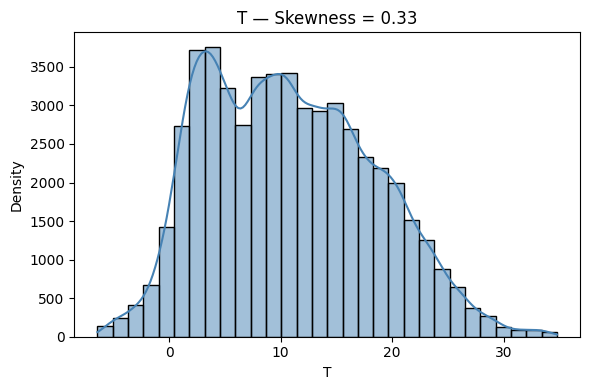

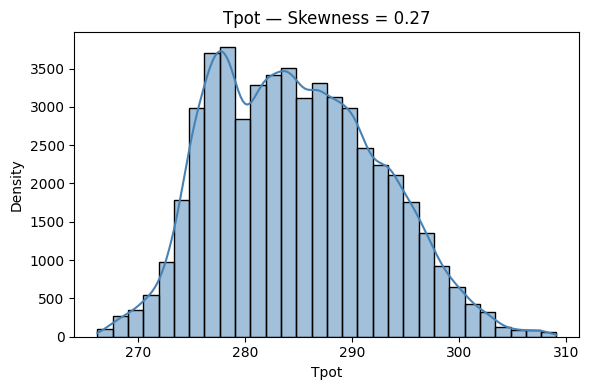

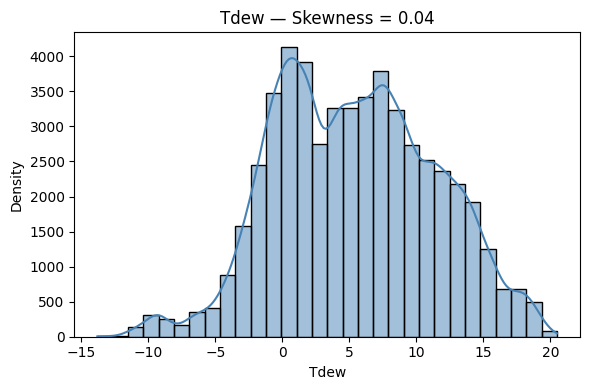

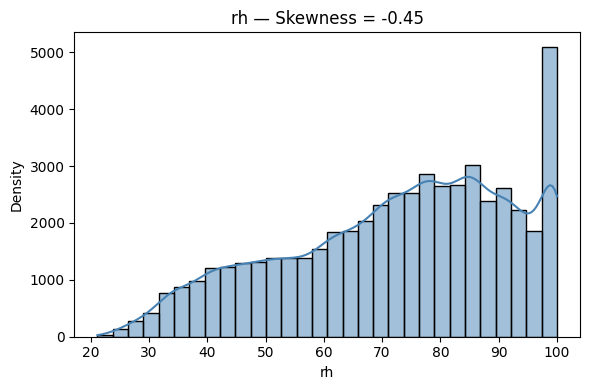

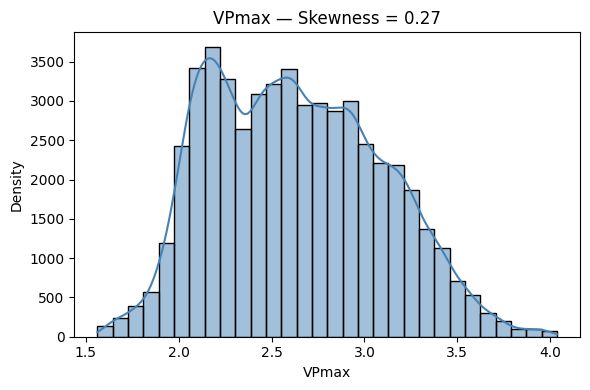

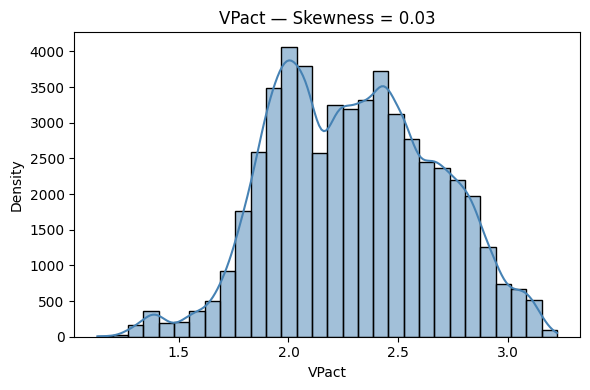

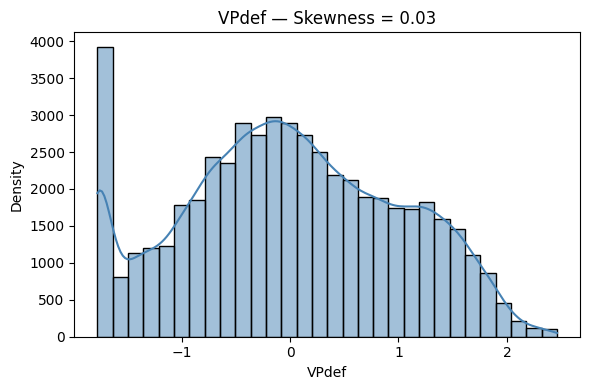

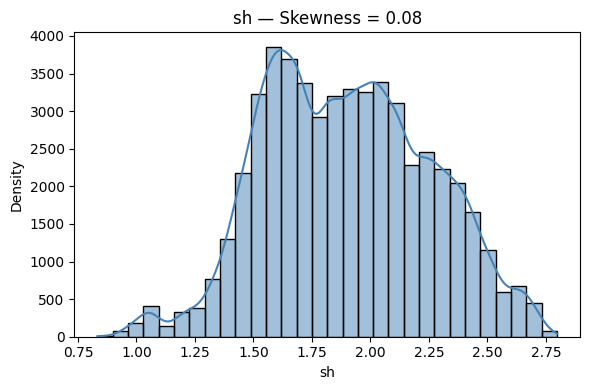

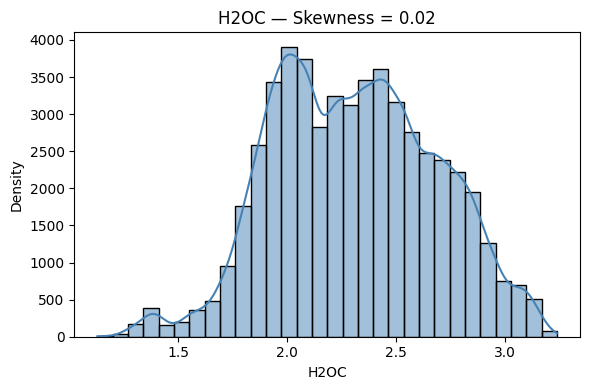

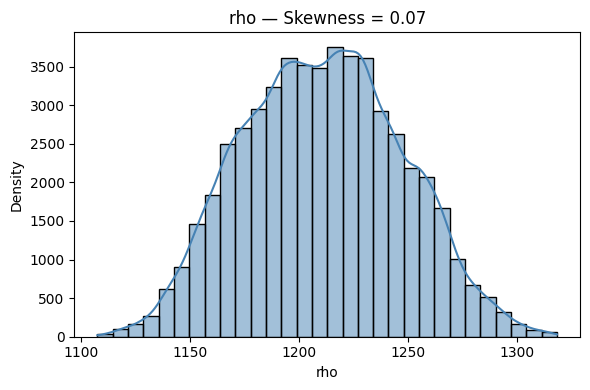

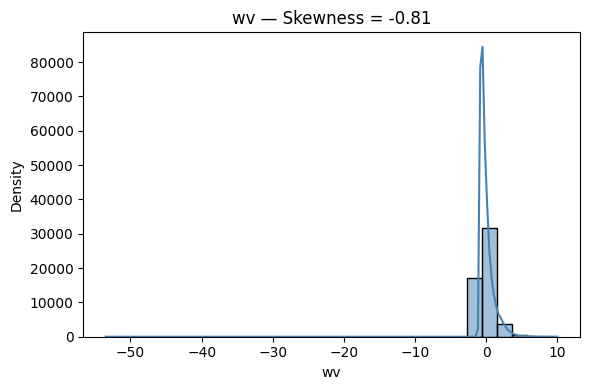

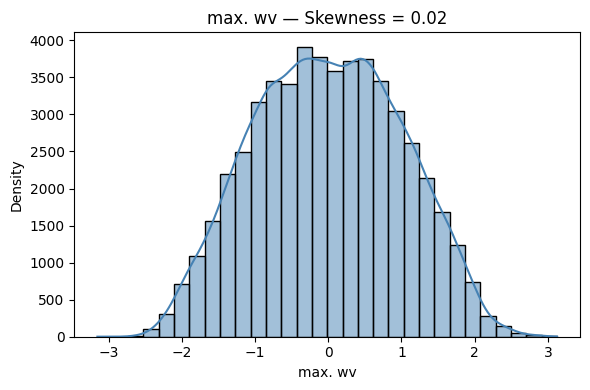

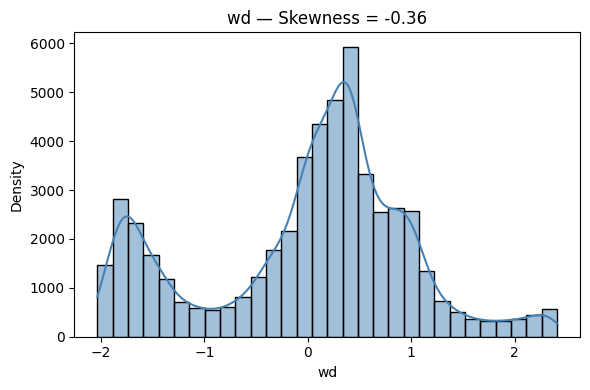

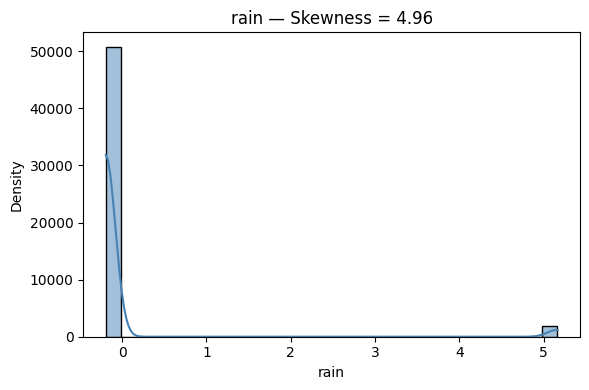

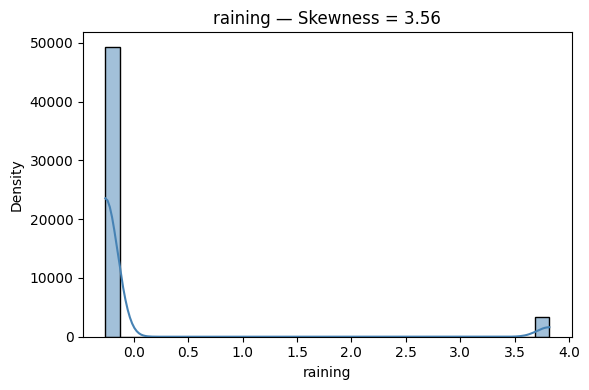

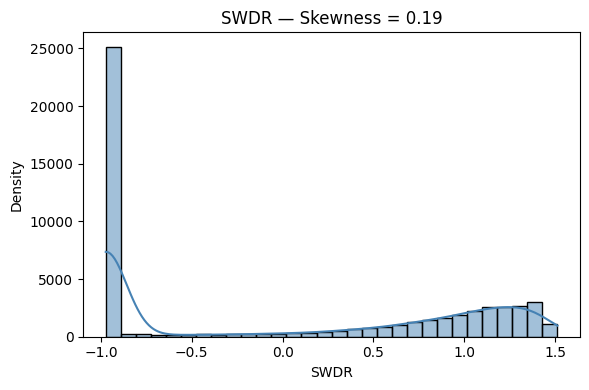

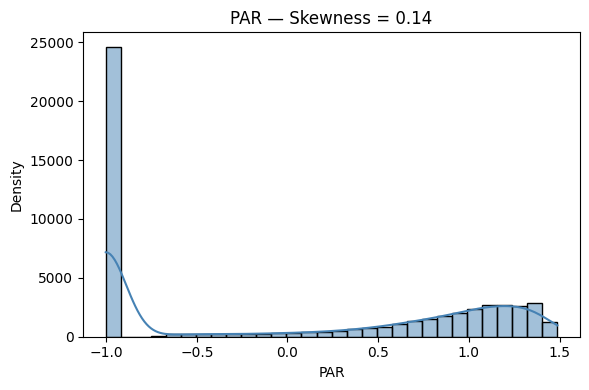

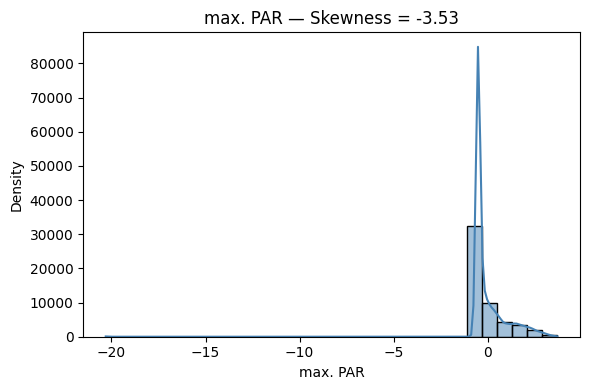

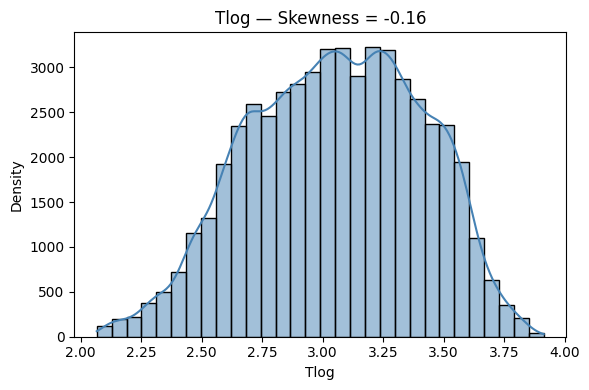

In [10]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='steelblue')
    skew_val_t = df[col].skew()  
    plt.title(f"{col} — Skewness = {skew_val_t:.2f}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

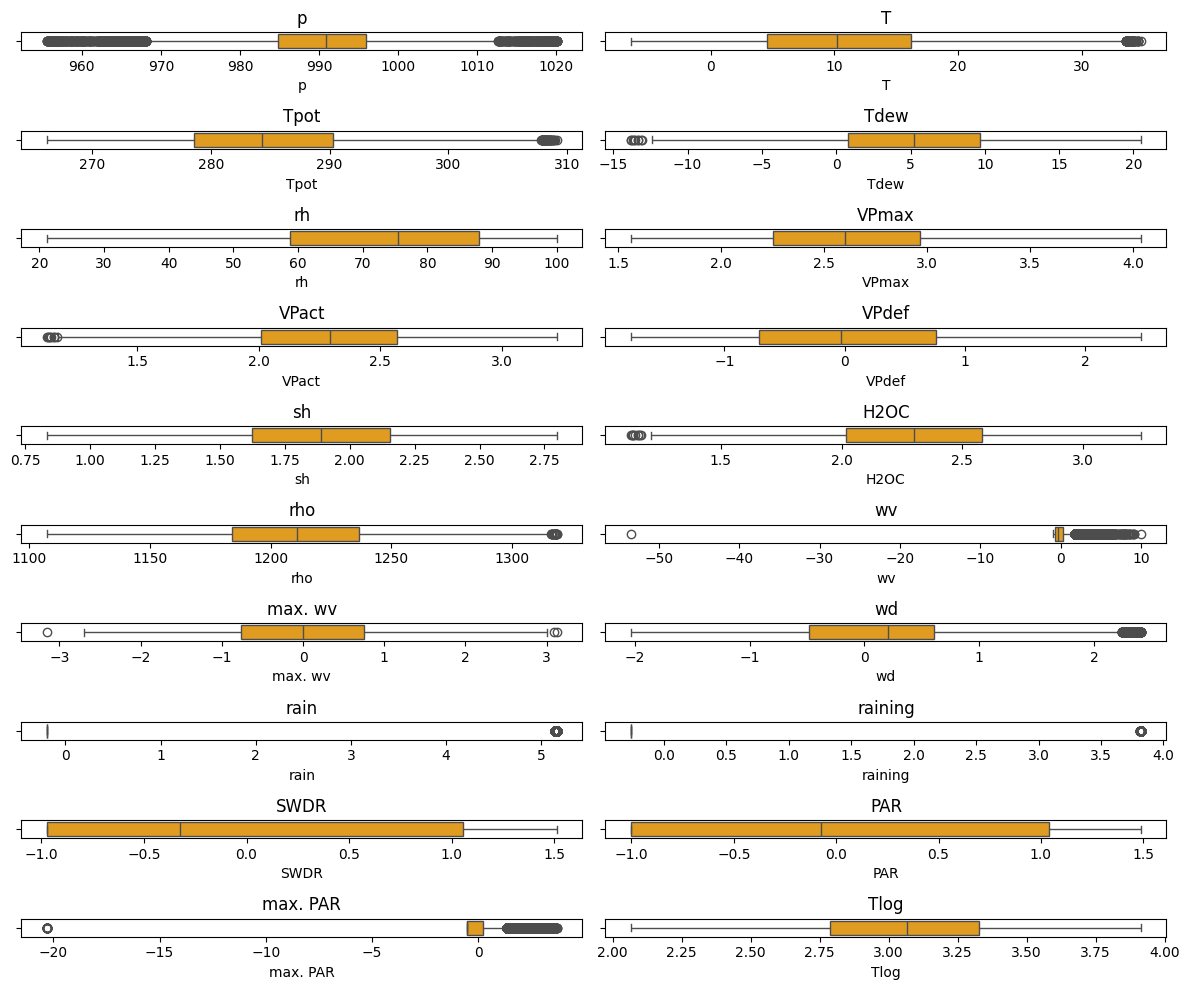

In [11]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 2 , 2, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(col)
    plt.tight_layout()
plt.show()

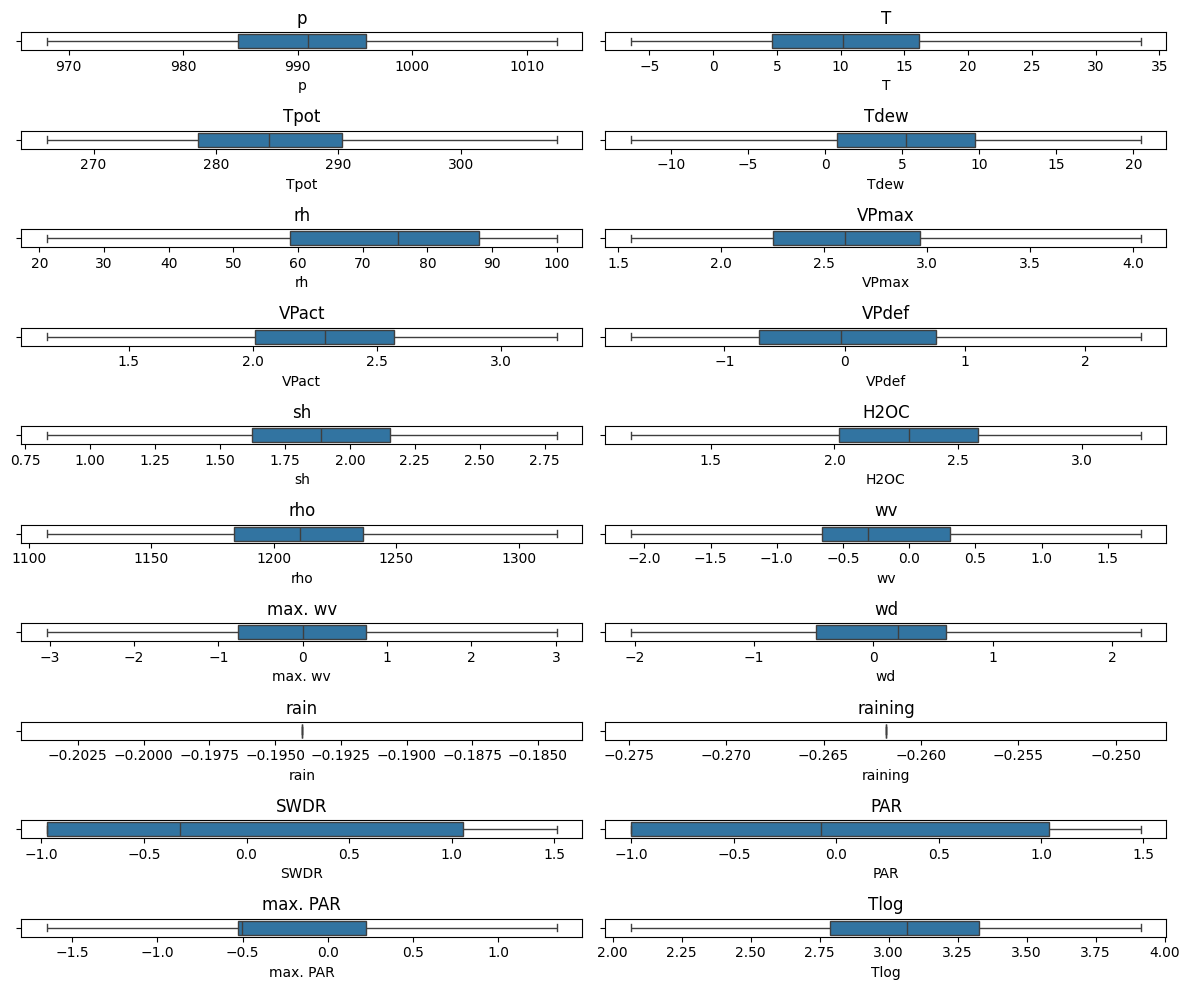

In [12]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 2 , 2, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [13]:
split_idx = int(0.70 * len(df)) 
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]
print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")

Train samples: 36887, Test samples: 15809


In [14]:
train_df = train_df.drop(columns=['date'])
test_df = test_df.drop(columns=['date'])

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

In [15]:
def create_sequences(data, lookback, target_col_index):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i, target_col_index])
    return np.array(X), np.array(y)

LOOKBACK = 72
target_idx = df.columns.get_loc('T')

X_train, y_train = create_sequences(train_scaled, LOOKBACK, target_idx)
X_test, y_test = create_sequences(test_scaled, LOOKBACK, target_idx)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (36815, 72, 20)
y_train shape: (36815,)


In [16]:
model = models.Sequential([
    layers.Input(shape=(LOOKBACK, X_train.shape[2])),
    layers.LSTM(128, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=30,batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[es],verbose=1
)

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - loss: 0.0068 - mae: 0.0410 - val_loss: 2.7692e-04 - val_mae: 0.0126
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 118s 754ms/step - loss: 5.2490e-04 - mae: 0.0176 - val_loss: 1.8216e-04 - val_mae: 0.0101
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 99s 686ms/step - loss: 3.8748e-04 - mae: 0.0150 - val_loss: 1.6067e-04 - val_mae: 0.0094
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 116s 807ms/step - loss: 3.2881e-04 - mae: 0.0138 - val_loss: 1.3260e-04 - val_mae: 0.0086
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 118s 636ms/step - loss: 2.8882e-04 - mae: 0.0129 - val_loss: 1.1632e-04 - val_mae: 0.0080
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 133s 578ms/step - loss: 2.6721e-04 - mae: 0.0124 - val_loss: 1.2416e-04 - val_mae: 0.0083
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 149s 624ms/step - loss: 2.3864e-04 - mae: 0.0117 - val_loss: 9.3977e-05 - val_mae: 0.0071
Epoch 8/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 143s 632ms/step - loss: 2.2190e-04 - mae: 0.0112 - val_los

In [18]:
loss, mae = model.evaluate(X_test, y_test, verbose=1)
rmse = np.sqrt(loss)

print(f"Test MSE: {loss:.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"Test MAE: {mae:.6f}")

492/492 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - loss: 2.9140e-05 - mae: 0.0039
Test MSE: 0.000029
Test RMSE: 0.005398
Test MAE: 0.003869


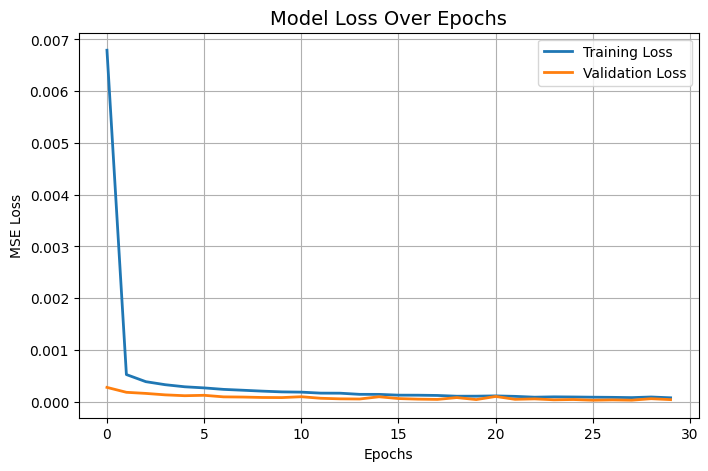

In [19]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

492/492 ━━━━━━━━━━━━━━━━━━━━ 51s 101ms/step


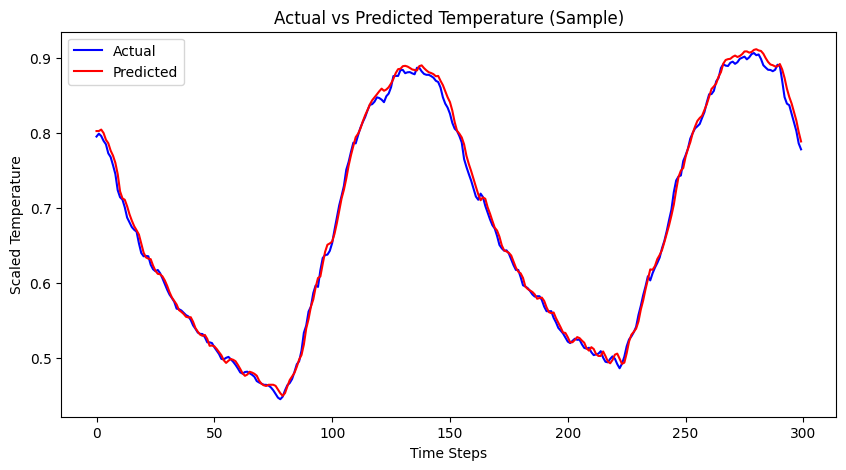

In [20]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(y_test[:300], label='Actual', color='blue')
plt.plot(y_pred[:300], label='Predicted', color='red')
plt.title('Actual vs Predicted Temperature (Sample)')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()

In [21]:
model.save("lstm_model.h5")